In [100]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from datetime import datetime as dt
import matplotlib.pyplot as plt # Import matplotlib
%matplotlib inline
%pylab inline
import seaborn as sns
import os

Populating the interactive namespace from numpy and matplotlib


Loading the stock ticker and all stocks file 

In [101]:
stocks = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [102]:
AABA = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')
AAPL= pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
AMZN= pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
AXP = pd.read_csv('AXP_2006-01-01_to_2018-01-01.csv')
BA = pd.read_csv('BA_2006-01-01_to_2018-01-01.csv')
CAT = pd.read_csv('CAT_2006-01-01_to_2018-01-01.csv')
CSCO = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv')
CVX = pd.read_csv('CVX_2006-01-01_to_2018-01-01.csv')
DIS = pd.read_csv('DIS_2006-01-01_to_2018-01-01.csv')
GE = pd.read_csv('GE_2006-01-01_to_2018-01-01.csv')
GOOGL= pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
GS = pd.read_csv('GS_2006-01-01_to_2018-01-01.csv')
HD = pd.read_csv('HD_2006-01-01_to_2018-01-01.csv')
IBM = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')
INTC = pd.read_csv('INTC_2006-01-01_to_2018-01-01.csv')
JNJ = pd.read_csv('JNJ_2006-01-01_to_2018-01-01.csv')
JPM = pd.read_csv('JPM_2006-01-01_to_2018-01-01.csv')
KO = pd.read_csv('KO_2006-01-01_to_2018-01-01.csv')
MCD = pd.read_csv('MCD_2006-01-01_to_2018-01-01.csv')
MMM = pd.read_csv('MMM_2006-01-01_to_2018-01-01.csv')
MRK = pd.read_csv('MRK_2006-01-01_to_2018-01-01.csv')
MSFT = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv')
NKE = pd.read_csv('NKE_2006-01-01_to_2018-01-01.csv')
PFE = pd.read_csv('PFE_2006-01-01_to_2018-01-01.csv')
PG = pd.read_csv('PG_2006-01-01_to_2018-01-01.csv')
TRV = pd.read_csv('TRV_2006-01-01_to_2018-01-01.csv')
UNH = pd.read_csv('UNH_2006-01-01_to_2018-01-01.csv')
UTX = pd.read_csv('UTX_2006-01-01_to_2018-01-01.csv')
VZ = pd.read_csv('VZ_2006-01-01_to_2018-01-01.csv')
WMT = pd.read_csv('WMT_2006-01-01_to_2018-01-01.csv') 
XOM = pd.read_csv('XOM_2006-01-01_to_2018-01-01.csv')

Droping the null values from the dataframes

In [52]:
stocks.dropna(inplace=True)
GOOGL.dropna(inplace=True)
MSFT.dropna(inplace=True)
AMZN.dropna(inplace=True)
company_list = stocks['Name'].unique()

Veiwing the top 5 rows of stocks dataframe

In [53]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


Extracting the year,month and day from the Date column for grouping the data in further analysis.
Created functions to extract and stored them in the stocks dataframe 

In [54]:
import datetime as dt

def year_stock(stocks):
    stocks = dt.datetime.strptime(stocks, "%Y-%m-%d")
    return(stocks.year)

def month_stock(stocks):
    stocks = dt.datetime.strptime(stocks, "%Y-%m-%d")
    return(stocks.month)

def date_stock(stocks):
    stocks = dt.datetime.strptime(stocks, "%Y-%m-%d")
    return(stocks.day)

stocks['Year']= list(map(year_stock,stocks['Date']))
stocks['Month']= list(map(month_stock,stocks['Date']))
stocks['dd']= list(map(date_stock,stocks['Date']))

In [55]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month,dd
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,1,3
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,1,4
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,1,5
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,1,6
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,1,9


We can see in the above dataframe yeaar, month ad dd column are added to stocks 

To further analyze the 2008 financial crisis year, created another dataframe stocks_2008

In [56]:
stocks_2008 = stocks[stocks['Year'] == 2008]
stocks_2008 = stocks_2008.groupby(['Month'],as_index=False).sum()
stocks_2008.set_index('Month', inplace=True)

Created a lime plot to see the aggregated volume traded in each month of 2008 
We can say that August month was most affeted with a big dip and the maximum stock trading happened in October

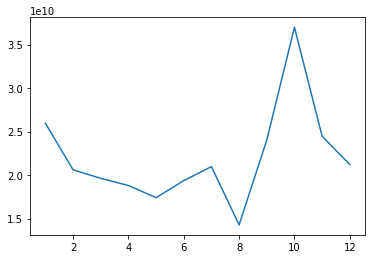

In [57]:
plt.plot(stocks_2008['Volume'])

To analyze data across different time periods, calculated the sum of volume traded from 2009 to 2017. 
THe below graph shows month wise lin chart for all the years 

In [58]:

stocks_2009 = stocks[stocks['Year'] == 2009]
stocks_2010 = stocks[stocks['Year'] == 2010]
stocks_2011 = stocks[stocks['Year'] == 2011]
stocks_2012 = stocks[stocks['Year'] == 2012]
stocks_2013 = stocks[stocks['Year'] == 2013]
stocks_2014 = stocks[stocks['Year'] == 2014]
stocks_2015 = stocks[stocks['Year'] == 2015]
stocks_2016 = stocks[stocks['Year'] == 2016]
stocks_2017 = stocks[stocks['Year'] == 2017]
stocks_2009_monthly = stocks_2009.groupby(['Month'], as_index = False).sum()
stocks_2010_monthly = stocks_2010.groupby(['Month'], as_index = False).sum()
stocks_2011_monthly = stocks_2011.groupby(['Month'], as_index = False).sum()
stocks_2012_monthly = stocks_2012.groupby(['Month'], as_index = False).sum()
stocks_2013_monthly = stocks_2013.groupby(['Month'], as_index = False).sum()
stocks_2014_monthly = stocks_2014.groupby(['Month'], as_index = False).sum()
stocks_2015_monthly = stocks_2015.groupby(['Month'], as_index = False).sum()
stocks_2016_monthly = stocks_2016.groupby(['Month'], as_index = False).sum()
stocks_2017_monthly = stocks_2017.groupby(['Month'], as_index = False).sum()

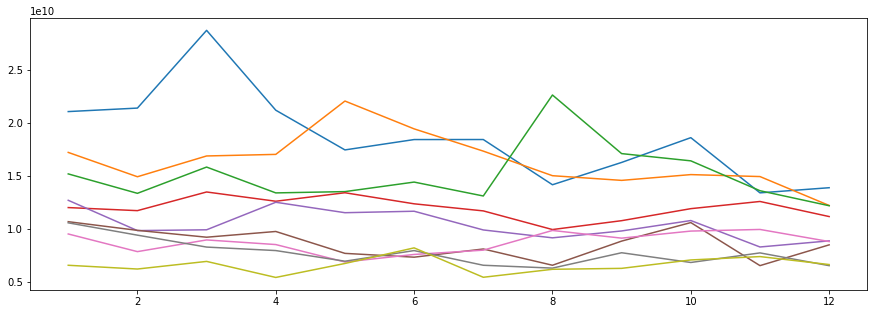

In [66]:
plt.figure(figsize = (15,5))
plt.plot(stocks_2009_monthly['Month'] , stocks_2009_monthly['Volume'])
plt.plot(stocks_2010_monthly['Month'] , stocks_2010_monthly['Volume'])
plt.plot(stocks_2011_monthly['Month'] , stocks_2011_monthly['Volume'])
plt.plot(stocks_2012_monthly['Month'] , stocks_2012_monthly['Volume'])
plt.plot(stocks_2013_monthly['Month'] , stocks_2013_monthly['Volume'])
plt.plot(stocks_2014_monthly['Month'] , stocks_2014_monthly['Volume'])
plt.plot(stocks_2015_monthly['Month'] , stocks_2015_monthly['Volume'])
plt.plot(stocks_2016_monthly['Month'] , stocks_2016_monthly['Volume'])
plt.plot(stocks_2017_monthly['Month'] , stocks_2017_monthly['Volume'])

Extracting the year,month and day from the Date column for grouping the data in further analysis. Created functions to extract and stored them in the GOOGL dataframe

In [69]:
import datetime as dt

def year_GOOGL(GOOGL):
    GOOGL = dt.datetime.strptime(GOOGL, "%Y-%m-%d")
    return(GOOGL.year)

def month_GOOGL(GOOGL):
    GOOGL = dt.datetime.strptime(GOOGL, "%Y-%m-%d")
    return(GOOGL.month)

def date_GOOGL(GOOGL):
    GOOGL = dt.datetime.strptime(GOOGL, "%Y-%m-%d")
    return(GOOGL.day)

GOOGL['Year']= list(map(year_GOOGL,GOOGL['Date']))
GOOGL['Month']= list(map(month_GOOGL,GOOGL['Date']))
GOOGL['dd']= list(map(date_GOOGL,GOOGL['Date']))

In [70]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.set_index('Date', inplace=True)

Set the date as index for the GOOGL dataframe for further data visualizations 

In depth analysis of google stock

Converting the Date column in the dataframe to pandas date datatype 

In [80]:
GOOGL.info()
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [16]:
GOOGL.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month,dd
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,2006,1,3
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,2006,1,4
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2006,1,5
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,2006,1,6
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,2006,1,9


Descriptive Analysis of Google stock price 

In [72]:
GOOGL.describe()

,Open,High,Low,Close,Volume,Year,Month,dd
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3019.000000,3019.000000,3019.000000
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06,2011.500497,6.548195,15.745611
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06,3.452064,3.424744,8.744905
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05,2006.000000,1.000000,1.000000
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06,2008.500000,4.000000,8.000000
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06,2011.000000,7.000000,16.000000
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06,2014.500000,10.000000,23.000000
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07,2017.000000,12.000000,31.000000


From the above results, we can see that the mean closing stock price was $428 with a standard deviation of 236 points  

In [73]:
AMZN.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08


Comparing Google and Amazon descriptive analsysis: 
1. Min closing stock price of Amazon was 26 while for Google was 128 
2. Standard deviation of stock prices higher for Amazon 
3. The Amazon stock price hasa range of 26-1195, while hte range of Google is 128-1085
3. Skewness is higher in Amazon stock price 

The maximum closing stock price of Google was $1085.09 and this was on 18th Decemeber, 2017

In [74]:
GOOGL[GOOGL['Close'] == max(GOOGL.Close)]

,Date,Open,High,Low,Close,Volume,Name,Year,Month,dd
3010,2017-12-18,1076.45,1086.49,1070.37,1085.09,1514601,GOOGL,2017,12,18


The maximum closing stock price of Amazon was $1195.83 and this was on 11th November, 2017

In [75]:
AMZN[AMZN['Close'] == max(AMZN.Close)]

,Date,Open,High,Low,Close,Volume,Name
2995,2017-11-27,1202.66,1213.41,1191.15,1195.83,6744045,AMZN


The minimum closing stock price of Google was $128.85 and this was on 24th November, 2008. This was clearly during the 2008 financial crisis which occured in the U.S.and affected every stock! 

In [ ]:
GOOGL[GOOGL['Close'] == min(GOOGL.Close)]

In [ ]:
The maximum closing stock price of Amazon was $26.07

In [9]:
AMZN[AMZN['Close'] == min(AMZN.Close)]

,Date,Open,High,Low,Close,Volume,Name
153,2006-08-11,26.43,26.43,25.76,26.07,5115908,AMZN


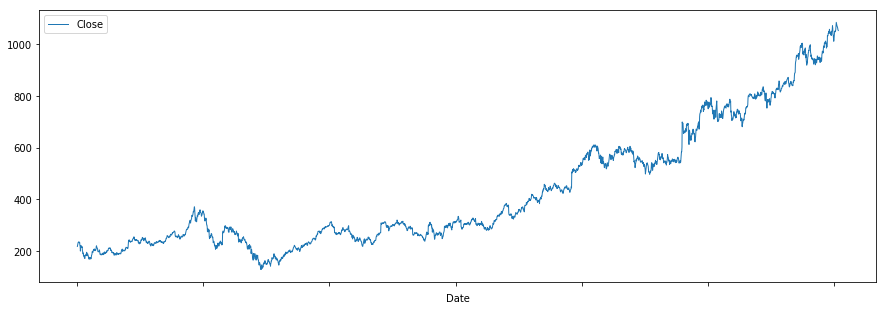

In [76]:
GOOGL.set_index('Date')
GOOGL.plot.line(x='Date',y='Close',figsize=(15,5),lw=1)

From the above graph, we can observe that 
1. The closing stock prices where all time low from 2008 to 2010 - THE GLOBAL FINANCIAL CRISIS 
2. The closing stock prices show an increasing trend from 2014 to 2018 

Candlestick chart of closing stock prices of Google for the all years 

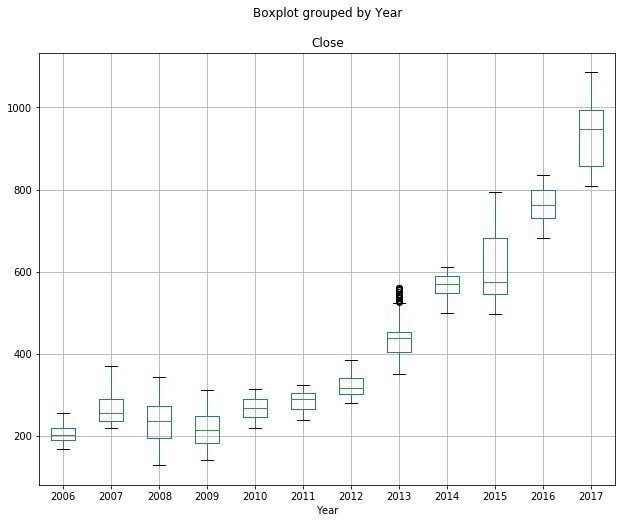

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
GOOGL.boxplot(column=['Close'], by='Year', ax=ax)

We can see from the above boxplot that the average did not change much from 2008 to 2011, but from 2012 onward it has been increasing. Also the range of values for the closing stock have varied over the years, and 2015 year has the highest skewness

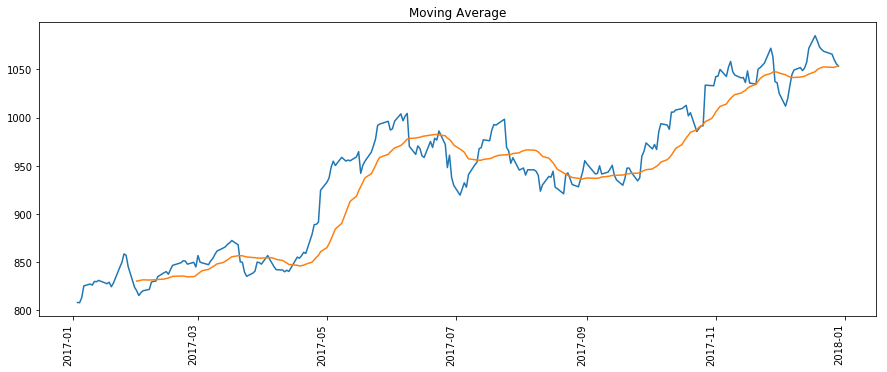

In [81]:
#Moving Average for Google 2017 December
GOOGL_df2= GOOGL[GOOGL['Date']>='2017-01-01']
date_range = GOOGL_df2['Date']
fig = plt.figure()
fig.set_size_inches(15,6)
ax=fig.add_subplot(111,title="Moving Average")

ax.plot(date_range,GOOGL_df2['Close'].values,label="Original")
ax.plot(date_range,GOOGL_df2.rolling(window=20,center=False)["Close"].mean().values)
fig.autofmt_xdate(rotation=90)

The above graph shows the original closing stock price line and the Simple Moving Average of Google stock price for the 2017 year. The sudden rise in May 2017 is explained by the Google Annual conference which happens in California every year. The 2017 conference had some big reveals with Google Home, Virtual Reality etc.
This had a sudden effect on the market and the stock prices increased as the buyer sentiment was positively impacted 

Setting the date as the default index for Amazon 

In [5]:
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZN.set_index('Date')

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN
2006-01-10,46.41,46.75,45.36,45.65,9686957,AMZN
2006-01-11,45.65,45.70,44.26,44.93,8497383,AMZN
2006-01-12,44.79,45.09,44.09,44.36,5818301,AMZN
2006-01-13,44.48,44.85,44.00,44.40,4432237,AMZN


Line chart of closing stock of Google stock price from 2006 to 2018

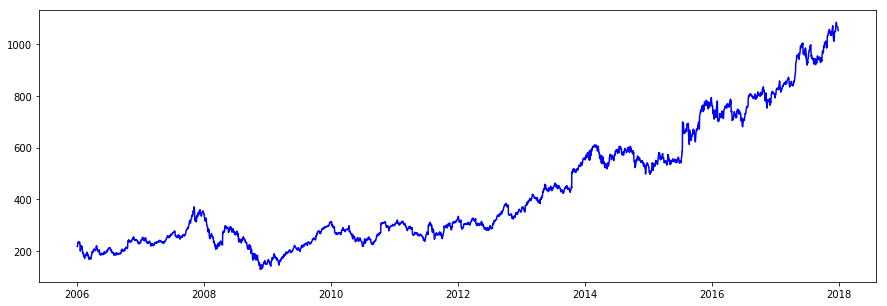

In [11]:
plt.figure(figsize = (15,5))
plt.plot(GOOGL['Date'], GOOGL['Close'],'b')

Line chart of closing stock of Amazon stock price from 2006 to 2018

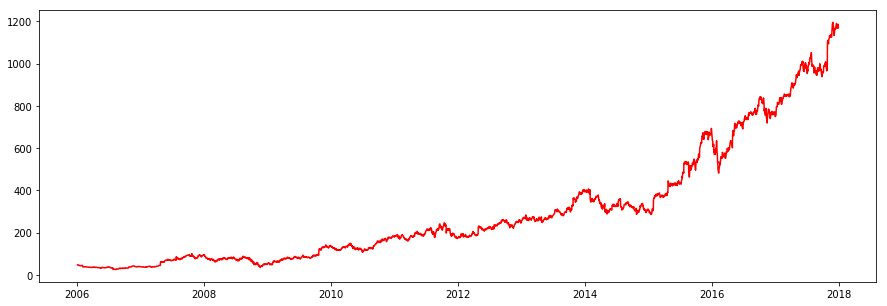

In [6]:
plt.figure(figsize = (15,5))
plt.plot(AMZN['Date'], AMZN['Close'],'r')

Comparison of Google and Amazon closing stock prices 

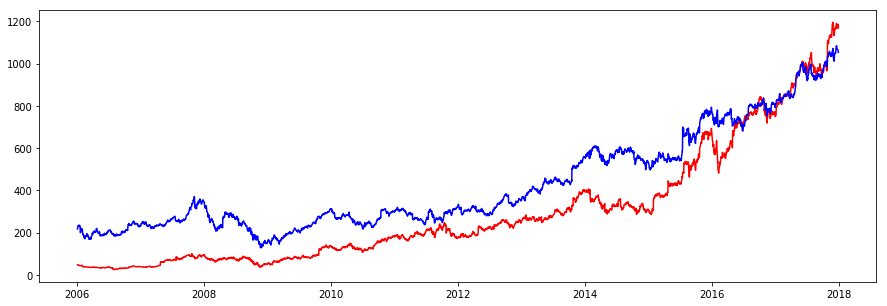

In [12]:
plt.figure(figsize = (15,5))
plt.plot(AMZN['Date'], AMZN['Close'],'r')
plt.plot(GOOGL['Date'], GOOGL['Close'],'b')

The above chart is a time series graph of closing stock price for Amazon and Google
1. Initially the stock price of Google was higher than Amazon 
2. From 2017 onwards, Amazon is enjoying a higher stock price compared to the giant Google 
3. In 2018, the difference between Amazon and Google is significantly visible 
4. Amazon is on a rise ! 

Comparing 5 stocks: 
Apple, IBM, Cisco, GE and 3M

In [18]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
AAPL.set_index('Date')

IBM['Date'] = pd.to_datetime(IBM['Date'])
IBM.set_index('Date')

CSCO['Date'] = pd.to_datetime(CSCO['Date'])
CSCO.set_index('Date')

GE['Date'] = pd.to_datetime(GE['Date'])
GE.set_index('Date')

MMM['Date'] = pd.to_datetime(MMM['Date'])
MMM.set_index('Date')

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM
2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM
2006-01-12,78.20,78.23,77.20,77.70,2121100,MMM
2006-01-13,76.95,78.20,76.95,77.50,1925300,MMM


Descriptive Statistics of all the 5 stocks 

In [82]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08


In [83]:
IBM.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [84]:
CSCO.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,24.031736,24.277714,23.793014,24.039632,4.440027e+07
std,5.031488,5.031514,5.035515,5.034167,2.875882e+07
min,13.930000,14.120000,11.780000,13.620000,6.155794e+06
25%,20.070000,20.270000,19.885000,20.105000,2.700610e+07
50%,23.840000,24.080000,23.600000,23.890000,3.974033e+07
75%,27.580000,27.805000,27.350000,27.545000,5.464026e+07
max,38.880000,39.000000,38.490000,38.740000,5.600389e+08


In [85]:
GE.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,25.132955,25.352649,24.891130,25.122232,5.367835e+07
std,7.405121,7.420543,7.404904,7.415372,4.408380e+07
min,6.750000,7.170000,5.730000,6.660000,7.261700e+06
25%,18.980000,19.140000,18.750000,18.957500,2.967695e+07
50%,25.380000,25.635000,25.170000,25.405000,4.102510e+07
75%,30.500000,30.782500,30.270000,30.535000,6.178820e+07
max,42.030000,42.150000,41.800000,42.120000,7.529061e+08


In [87]:
MMM.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,111.776588,112.615732,110.986366,111.861844,3.342332e+06
std,44.430095,44.566951,44.348715,44.493695,1.901379e+06
min,41.310000,42.450000,40.870000,41.830000,8.708300e+04
25%,79.235000,79.810000,78.335000,79.117500,2.100641e+06
50%,89.670000,90.335000,88.860000,89.775000,2.856926e+06
75%,145.845000,147.622500,145.250000,146.412500,3.982672e+06
max,243.190000,244.230000,239.150000,243.140000,2.436050e+07


Observations from Descritpive Analysis: 
1. Lowest closing stock price observed is of GM, while highest is of 3M
2. Apple and 3M stock has the largest standard deviation, while the lowest was in Cisco

Line chart comparison of Closing stock value of all the 5 stocks over time 

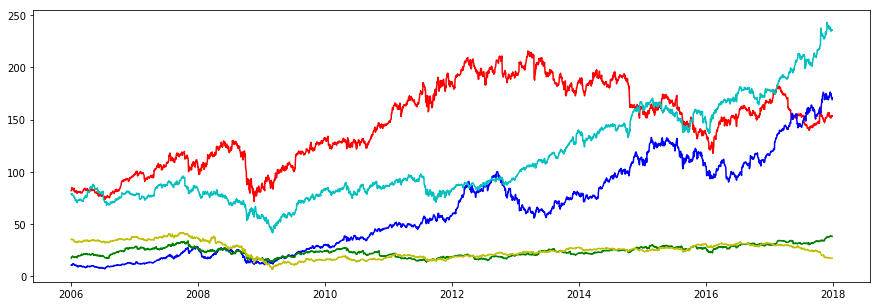

In [23]:
plt.figure(figsize = (15,5))
plt.plot(IBM['Date'], IBM['Close'],'r')
plt.plot(AAPL['Date'], AAPL['Close'],'b')
plt.plot(CSCO['Date'], CSCO['Close'],'g')
plt.plot(GE['Date'], GE['Close'],'y')
plt.plot(MMM['Date'], MMM['Close'],'c')

Observations from above graph: 
    1. IBM saw a rise from 2008 to 2014 but since then has been on a decline 
    2. Apple remained stagnant till 2008, but has increased since then 
    3. 3M has showed maximum growth compared to others 
    4. CISO and GE stock prices performance has remained constant over the years

Further analysis of Volume traded by Apple and GE. 
Apple has the highest volume traded among the 5 stocks 

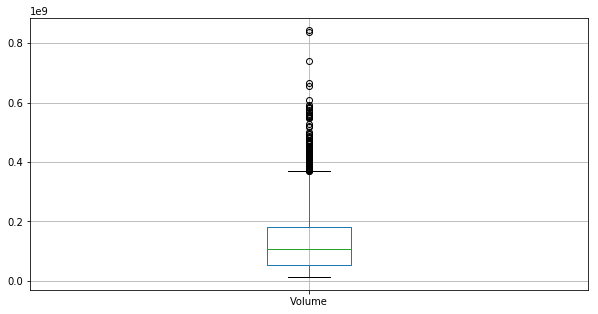

In [99]:
fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle('')
AAPL.boxplot(column=['Volume'], ax=ax)

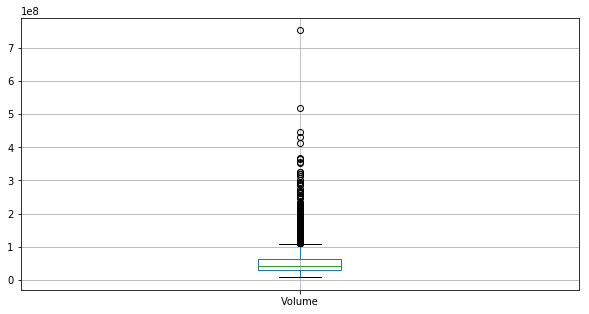

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
plt.suptitle('')
GE.boxplot(column=['Volume'], ax=ax)